## Import Dependencies

In [1]:
# Data Manipulation Libraries: Standard dataframes and array libraries
import pandas as pd
import numpy as np
# from datetime import datetime
import datetime

# Data Visualization Libraries:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Data Analysis: Statistics and Machine Learning Libraries
from scipy import stats

# Displaying plots in jupter notebook
%matplotlib inline
# Displaying pandas columns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

<hr style="border: 2px solid black">

## Import Data
 - Data downloaded from https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-2019/63jg-8b9z on 12/3/19 and then on 3/4/20
 - Data will be filtered for specific columns.

In [2]:
# Columns that will be imported
columns = ['Date Rptd', 'Crm Cd 1', 'Crm Cd Desc', 'AREA NAME', 'Weapon Used Cd', 'Weapon Desc', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Status Desc', 'LAT', 'LON']

In [3]:
# Import data
df = pd.read_csv('Crime_Data_from_2010_to_2019.csv', usecols=columns)

In [4]:
# Shape of dataframe
df.shape

(2112242, 12)

In [5]:
# Confirm data has been filtered for years between 2010 - 2019
print(df['Date Rptd'].min(), df['Date Rptd'].max())

01/01/2010 12:00:00 AM 12/31/2019 12:00:00 AM


<hr style="border: 2px solid black">

# Data Wrangling Overview

## 1. Clean Data
 - Relabel columns
 - Replace values in rows
 - Drop instances that have missing values for reported date and crime codes
 - Create new features
 - Change datatypes

## 2. Create <em>Subset 1:</em> <Font Color="red">df_crimes</font> 

## 3. Create <em>Subset 2:</em> <Font Color="red">df_crimes_weapons</font> 
 - Dataframe filtered for only instances with weapon codes

# 1. <font color="blue">Clean data</font>

 - a) Rename columns
 - b) Relabel victim descriptions
 - c) Drop instances in dataset that have missing values for the reported date and crime codes
 - d) Convert reported date ('date') column into datetime object
 - e) Create a 'year' column
 - f) Change additional datatypes

### a) Rename columns

In [6]:
# list of new column names
new_col_names = ["Date", "Area", "Crime_Desc", 'Vict_Age', 'Vict_Sex', 'Vict_Desc', "Weapon_Code", "Weapon_Desc", 'Status', "Crime_Code", 'Lat', 'Lng']
# Rename Columns using columns method
df.columns = new_col_names

### b) Relabel victim descriptions

In [7]:
# Dictionary containing victim description information
descent_dict = {'A' : 'Other Asian', 'B' : 'Black', 'C' : 'Chinese', 'D' : 'Cambodian', 'F' : 'Filipino', 'G' : 'Guamanian', 'H' : 'Hispanic/Latin/Mexican', 'I' : 'American Indian/Alaskan Native', 'J' : 'Japanese', 'K' : 'Korean', 'L' : 'Laotian', 'O' : 'Other', 'P' : 'Pacific Islander', 'S': 'Samoan', 'U': 'Hawaiian', 'V': 'Vietnamese', 'W': 'White', 'X': 'Unknown', 'Z':'Asian Indian'}

In [8]:
# Rename the vict desc column
df['Vict_Desc'].replace(descent_dict, inplace=True)

### c) Drop instances in dataset that have missing values for the reported date and crime codes

 - First check how many unique crime codes are in the dataframe
 - Drop missing values
 - Then confirm how many unique crime codes were lost

In [9]:
# number of unique crimes codes before missing values dropped
unique_crime_codes = len(df["Crime_Code"].unique())
print(f"The number of unique crime codes listed in the unfiltered dataset is:\n {unique_crime_codes}")

The number of unique crime codes listed in the unfiltered dataset is:
 149


In [10]:
# Drop any observations lacking a reported date, and a crime code
df.dropna(how='any', subset=['Date', 'Crime_Code'], inplace=True)

In [11]:
# number of crimes codes
crime_codes_post_drop = len(df["Crime_Code"].unique())
print(f"The number of unique crime codes after \nmissing values were drop: {crime_codes_post_drop}")

The number of unique crime codes after 
missing values were drop: 148


<strong> 
### <font color="blue">Comment:</font>
 - 1 crime code was dropped</strong>

### d) Convert reported date ('date') column into datetime object

In [12]:
# Convert the date column to a date object
df['Date'] =  pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')

### e) Create a 'year' column

In [13]:
df['Year'] = df['Date'].dt.year

In [14]:
# Drop any instance that occured in 2020
df = df[df.Year != 2020]

In [15]:
df['Year'].value_counts()

2017    231565
2018    230436
2016    225864
2019    220264
2015    214932
2010    200509
2012    200011
2011    197762
2014    194888
2013    192031
Name: Year, dtype: int64

### f) Change additional datatypes

In [16]:
# Organize columns names by datatype
cat_col = ['Vict_Sex', 'Vict_Desc', 'Weapon_Desc', 'Status', 'Area', 'Crime_Desc']
int_col = ['Vict_Age', 'Crime_Code']
flot_col = ['Lat', 'Lng']

In [17]:
# Convert into cat columns
df[cat_col] = df[cat_col].astype('category')
# Convert into flot columns
df[flot_col] = df[flot_col].astype('float')
# Convert into int columns
df[int_col] = df[int_col].astype('int')

In [18]:
# Confirm changes
df.dtypes

Date           datetime64[ns]
Area                 category
Crime_Desc           category
Vict_Age                int64
Vict_Sex             category
Vict_Desc            category
Weapon_Code           float64
Weapon_Desc          category
Status               category
Crime_Code              int64
Lat                   float64
Lng                   float64
Year                    int64
dtype: object

<hr style="border: 2px solid black">

# 2. Create Dataframe: <font color="red">df_crimes</font>

In [19]:
# Create a copy so that we keep the original dataframe in tact
df_crimes = df.copy(deep=True)

In [20]:
# Evaluate how many attributes have missing values
df_crimes.describe()

,Vict_Age,Weapon_Code,Crime_Code,Lat,Lng,Year
count,2.108262e+06,709145.000000,2.108262e+06,2.108262e+06,2.108262e+06,2.108262e+06
mean,3.178311e+01,371.320296,5.068908e+02,3.406371e+01,-1.183087e+02,2.014663e+03
std,2.063566e+01,113.522111,2.103269e+02,7.118974e-01,2.441808e+00,2.877002e+00
min,-9.000000e+00,101.000000,1.100000e+02,0.000000e+00,-1.188279e+02,2.010000e+03
25%,2.000000e+01,400.000000,3.300000e+02,3.401030e+01,-1.184363e+02,2.012000e+03
50%,3.200000e+01,400.000000,4.420000e+02,3.406230e+01,-1.183295e+02,2.015000e+03
75%,4.600000e+01,400.000000,6.260000e+02,3.417570e+01,-1.182778e+02,2.017000e+03
max,1.180000e+02,516.000000,9.990000e+02,3.479070e+01,0.000000e+00,2.019000e+03


<strong>

### <font color="blue">Comment:</font>
 - The Weapon Used code has a high number of missing values, because not all crimes involve weapons
 - There is also data on missing victim ages
 
</strong>

<hr style="border: 2px solid black">

# 3. Create Dataframe: <font color="red">df_crimes_weapons</font>

In [21]:
# This method filteres data without changing the orginal dataset
df_crimes_weapons = df_crimes[df_crimes['Weapon_Code'].notnull()].copy(deep=True)

In [22]:
# Confirm data was filtered
df_crimes_weapons.describe()

,Vict_Age,Weapon_Code,Crime_Code,Lat,Lng,Year
count,709145.000000,709145.000000,709145.000000,709145.000000,709145.000000,709145.000000
mean,33.094364,371.320296,522.434350,34.048189,-118.288678,2014.709107
std,16.766910,113.522111,240.212836,0.715097,2.455693,2.908060
min,-9.000000,101.000000,110.000000,0.000000,-118.766800,2010.000000
25%,22.000000,400.000000,230.000000,33.995300,-118.403200,2012.000000
50%,31.000000,400.000000,624.000000,34.048800,-118.304800,2015.000000
75%,45.000000,400.000000,626.000000,34.142200,-118.270900,2017.000000
max,99.000000,516.000000,956.000000,34.790700,0.000000,2019.000000


<hr style="border: 4px solid blue">

# <Font Color="blue">Analysis Overview</font> 

### Characterize victims
 - Describe victims of all crimes (age, age * gender, ethnicity)
 - Describe victims of weapon related crimes only (age, age * gender, ethnicity)

### Characterize crimes and weapons in dataset
 - Determine the total number of crimes by year
 - Determine the crimes by LA area (all crimes and weapon related crimes)
 - Determine the top 10 crimes between 2010-2019
 - Determine the top 10 weapon related crimes between 2010-2019
 - Determine how the number of reported incidens of the 10 top weapons have change between 2010-2019


Subset 3 <font color="red">df_areas_crimes</font>

<hr style="border: 4px solid blue">

## Characterize the Victim Ages for All crimes using the <font color="red">df_crimes</font> subset

In [23]:
# Descriptive statistics for victim ages
df_crimes[['Vict_Age']].describe().apply(lambda x: '%5f' % x, axis=1)

count    2108262.000000
mean          31.783110
std           20.635657
min           -9.000000
25%           20.000000
50%           32.000000
75%           46.000000
max          118.000000
dtype: object

<strong>

### <font color="blue">Comment:</font>
 - The mean age of victims is 31.5 yrs old
</strong>

<hr style="border: 1px solid black">

## Characterize the Age of Victims by Sex using <font color="red">df_crimes</font> subset

In [24]:
# Minor subset to evaluate victim sex by age, but need to omit the category datatype from victim
vict_age_sex_df = df_crimes[["Vict_Sex", "Vict_Age"]]

In [25]:
# Use a boolean to filter dataset to just M or F victims
vict_age_sex_df = vict_age_sex_df[(df_crimes.Vict_Sex == 'M') | (vict_age_sex_df.Vict_Sex == 'F')]

In [26]:
# Convert category column to string in order to just plot male and female
# Otherwise, the x axis will display all categories in this column
vict_age_sex_df['Vict_Sex'] = vict_age_sex_df['Vict_Sex'].astype(str)

<hr style="border: 1px solid black">

## Visualize the Age of Victims by Sex using <font color="red">df_crimes</font> subset

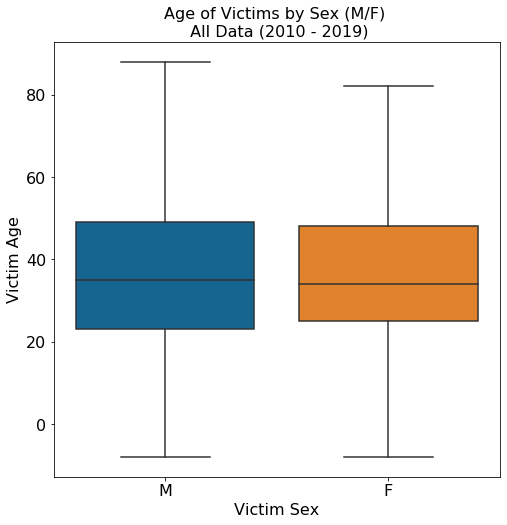

In [27]:
plt.figure(figsize=(8,8))
plt.style.use('tableau-colorblind10')
ax = sns.boxplot(x="Vict_Sex", y="Vict_Age", data=vict_age_sex_df, showfliers=False)
ax.set_xlabel("Victim Sex", fontsize=16)
ax.set_ylabel("Victim Age", fontsize=16)
plt.yticks(fontsize=16, color='black')
plt.xticks(fontsize=16, color='black')
plt.title("Age of Victims by Sex (M/F) \n All Data (2010 - 2019)", fontsize=16)
plt.savefig("static/images/Figure7.png", bbox_inches='tight') 
plt.show()

<hr style="border: 1px solid black">

## Visualize age distribution of victims of All Crimes using the <font color="red">df_crimes</font> subset

In [28]:
# Subset data by victim sex for females
female_age_data = vict_age_sex_df.loc[vict_age_sex_df["Vict_Sex"] == "F"][['Vict_Age']]
# array with the female data
female_ages = female_age_data['Vict_Age'].values

In [29]:
# Subset data by victim sex for males
male_age_data = vict_age_sex_df.loc[vict_age_sex_df["Vict_Sex"] == "M"][['Vict_Age']]
# array with the male data
male_ages = male_age_data['Vict_Age'].values

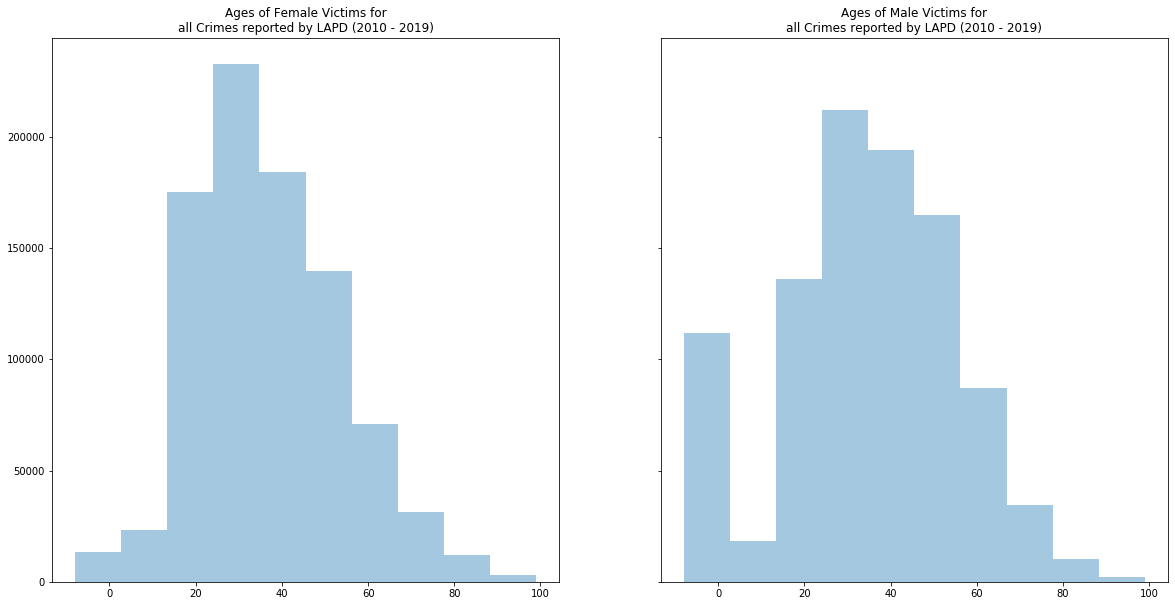

In [30]:
# Plot all the victim age for all victims
fig1, axs1 = plt.subplots(ncols=2, sharex=False, sharey=True, figsize=(20, 10))
sns.distplot(female_ages, bins=10, kde=False, color='tab:blue', ax=axs1[0]).set_title('Ages of Female Victims for\nall Crimes reported by LAPD (2010 - 2019)')
sns.distplot(male_ages, bins=10, kde=False, color='tab:blue', ax=axs1[1]).set_title('Ages of Male Victims for\nall Crimes reported by LAPD (2010 - 2019)')
fig1.savefig("static/images/Figure8.png", bbox_inches='tight')
plt.show()

<hr style="border: 2px solid black">

## Characterize the Age of Weapon Related Crimes Victims using <font color="red">df_crimes_weapons</font> subset

In [31]:
df_crimes_weapons[['Vict_Age']].describe().apply(lambda x: '%5f' % x, axis=1)

count    709145.000000
mean         33.094364
std          16.766910
min          -9.000000
25%          22.000000
50%          31.000000
75%          45.000000
max          99.000000
dtype: object

<strong>

### <font color="blue">Comment:</font>
 - The mean age of victims is 31.8 yrs old
 - 0.3 higher than the age of all victims
</strong>

<hr style="border: 1px solid black">

## Characterize the Age of Weapon Related Crimes Victims by Sex <font color="red">df_crimes_weapons</font> subset

In [32]:
# Minor subset to evaluate victim sex by age, but need to omit the category datatype from victim se
vict_age_sex_weapon_df = df_crimes_weapons[["Vict_Sex", "Vict_Age"]]

In [33]:
# Use a boolean to filter dataset to just M or F victims
vict_age_sex_weapon_df = vict_age_sex_weapon_df[(vict_age_sex_weapon_df.Vict_Sex == 'M') | (vict_age_sex_weapon_df.Vict_Sex == 'F')]

In [34]:
# Convert category column to string in order to just plot male and female
# Otherwise, the x axis will display all categories in this column
vict_age_sex_weapon_df['Vict_Sex'] = vict_age_sex_weapon_df['Vict_Sex'].astype(str)

<hr style="border: 1px solid black">

## Visualize the Age of Victims by Sex using <font color="red">df_crimes_weapons</font> subset

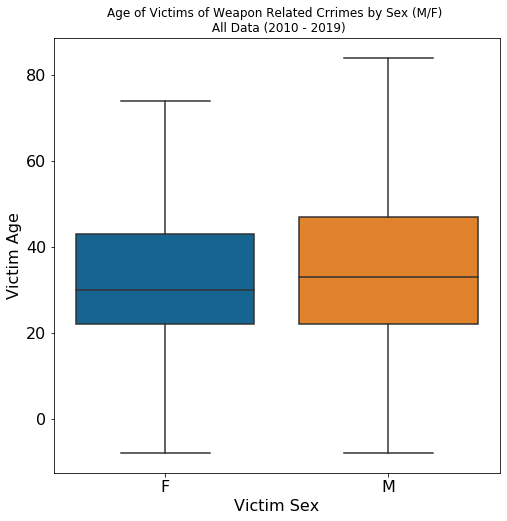

In [35]:
plt.figure(figsize=(8,8))
plt.style.use('tableau-colorblind10')
ax = sns.boxplot(x="Vict_Sex", y="Vict_Age", data=vict_age_sex_weapon_df, showfliers=False)
ax.set_xlabel("Victim Sex", fontsize=16)
ax.set_ylabel("Victim Age", fontsize=16)
plt.yticks(fontsize=16, color='black')
plt.xticks(fontsize=16, color='black')
plt.title("Age of Victims of Weapon Related Crrimes by Sex (M/F) \n All Data (2010 - 2019)")
plt.savefig("static/images/Figure9.png", bbox_inches='tight') 
plt.show()

<hr style="border: 1px solid black">

## Visualize distribution of the ages of victims in weapon related crimes using <font color="red">df_crimes_weapons</font> subset

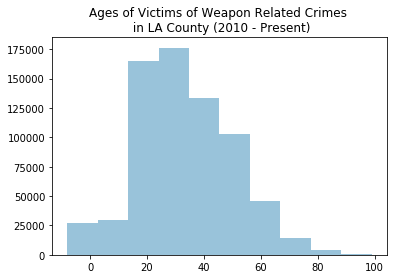

In [36]:
# Plot all the victim age for all victims
sns.distplot(vict_age_sex_weapon_df[['Vict_Age']], bins=10, kde=False).set_title('Ages of Victims of Weapon Related Crimes \n in LA County (2010 - Present)')
# plt.savefig("static/images/plot_vict_age_all_histogram.png", bbox_inches='tight')
plt.show()

<strong>

### <font color="blue">Comment:</font>
 - Victims are between 20-40
</strong>

<hr style="border: 1px solid black">

## Visualize age distribution of victims of weapon related crimes using <font color="red">df_crimes_weapons</font> subset

In [37]:
# Subset data by victim sex for only known sexes
w_female_ages_data = vict_age_sex_weapon_df.loc[vict_age_sex_weapon_df["Vict_Sex"] == "F"][['Vict_Age']]
# array with the female data
w_female_data = w_female_ages_data['Vict_Age'].values

In [38]:
w_male_ages_data = vict_age_sex_weapon_df.loc[vict_age_sex_weapon_df["Vict_Sex"] == "M"][['Vict_Age']]
# array with the male data
w_male_data = w_male_ages_data['Vict_Age'].values

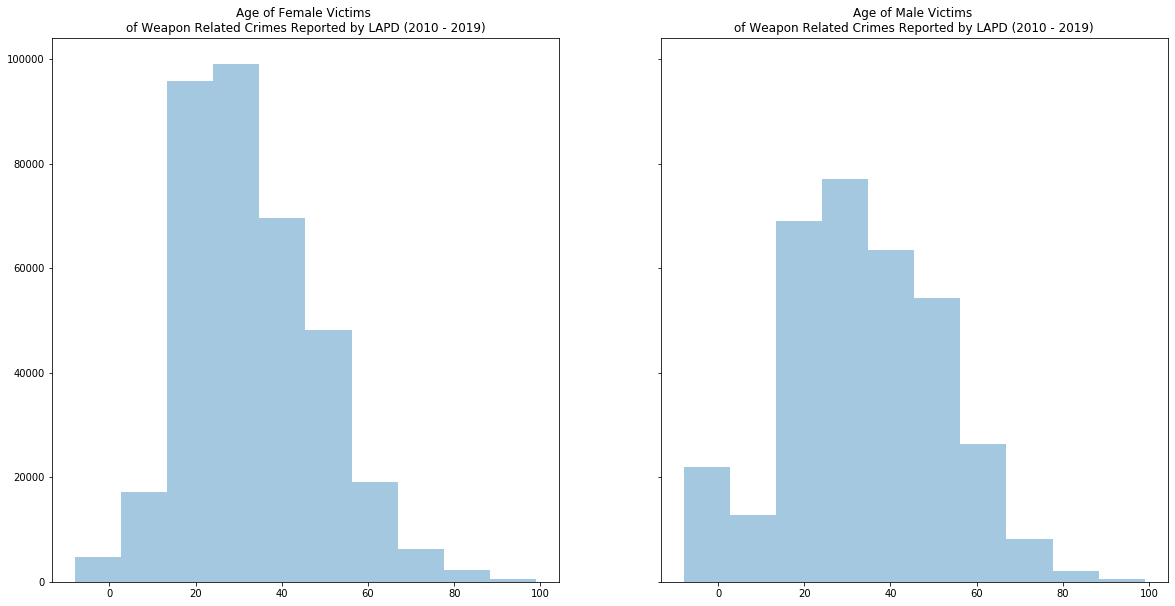

In [39]:
# Plot all the victim age for all victims
fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20, 10))
sns.distplot(w_female_data, bins=10, kde=False, color='tab:blue', ax=axs1[0]).set_title('Age of Female Victims \nof Weapon Related Crimes Reported by LAPD (2010 - 2019)')
sns.distplot(w_male_data, bins=10, kde=False, color='tab:blue', ax=axs1[1]).set_title('Age of Male Victims \nof Weapon Related Crimes Reported by LAPD (2010 - 2019)')
fig1.savefig("static/images/Figure10.png", bbox_inches='tight')
plt.show()

<strong>

### <font color="blue">Comment:</font>
 - Female victims of weapon related crimes appear to be younger than male victims
</strong>

<hr style="border: 2px solid black">

## Determine if there is a difference in the mean number of weapon related crimes between male and females using the <font color="red">df_crimes_weapons</font> subset

### Test for normality and equal variance
 - cannot use a shapiro-wilk test because the p value will not be accurate with N > 5000

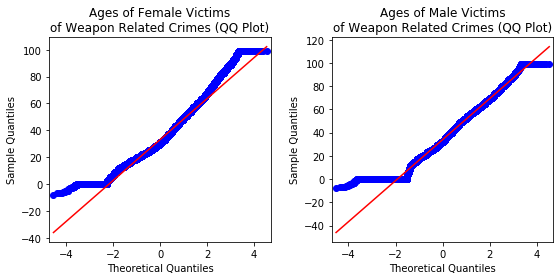

In [40]:
import scipy.stats as stats
left = -1.8
fig = plt.figure(figsize=(8,4))

# qq plot for female victims
ax = fig.add_subplot(1, 2, 1)
sm.graphics.qqplot(w_female_data, line='s', ax=ax)
top = ax.get_ylim()[1] * 0.75
ax.title.set_text('Ages of Female Victims\nof Weapon Related Crimes (QQ Plot)')
plt.yticks(color='black')
plt.xticks(color='black')
plt.ylabel('Sample Quantiles', color='black')
plt.xlabel('Theoretical Quantiles', color='black')

# qq plot for male victims
ax = fig.add_subplot(1, 2, 2)
sm.graphics.qqplot(w_male_data, line='s', ax=ax)
top = ax.get_ylim()[1] * 0.75
ax.title.set_text("Ages of Male Victims\nof Weapon Related Crimes (QQ Plot)")
plt.yticks(color='black')
plt.xticks(color='black')
plt.ylabel('Sample Quantiles', color='black')
plt.xlabel('Theoretical Quantiles', color='black')

fig.tight_layout()
fig.savefig("static/images/Figure11.png", bbox_inches='tight')
plt.show()

In [41]:
# Test for equal variance
# scipy.stats.bartlett because I know the samples are normally distributed
barlette_result = stats.bartlett(w_female_data, w_male_data)
if barlette_result[1] >= 0.05:
    print("Do not reject the null hypothesis, all the input samples are from populations with equal variances.")
else:
    print("Reject the null hypothesis, the samples do not have equal variance")

Reject the null hypothesis, the samples do not have equal variance


### Welch’s t-test for two indepedent samples

In [42]:
vict_sex_t_test = stats.ttest_ind(w_female_data, w_male_data, equal_var=False)
if vict_sex_t_test[1] >= 0.05:
    print(f"The p values is {vict_sex_t_test[1]}. Do not reject the null hypothesis.")
else:
    print(f"The p values is {vict_sex_t_test[1]}. \nReject the null hypothesis, there is evidence to suggest a significantly difference between samples.")

The p values is 3.7650149124141423e-125. 
Reject the null hypothesis, there is evidence to suggest a significantly difference between samples.


## <font color='red'>There is significant difference in the mean age of victims by sex.</font>

<hr style="border: 3px solid blue">

# Victim Descent using <font color="red">df_crimes</font> dataset

 - Descriptive statistics for victims of all crimes by ethnicity
 - Descriptive statistics for victims of weapon related crimes by ethnicity

## Descriptive statistics for victims of all crimes by ethnicity using <font color="red">df_crimes</font> dataset

In [43]:
# top10_vict_desc_all_crimes
top10_vict_desc_all_crimes = df_crimes['Vict_Desc'].value_counts(ascending=False)[0:10]
top10_vict_desc_all_crimes

Hispanic/Latin/Mexican            723688
White                             508557
Black                             334347
Other                             202140
Unknown                            77092
Other Asian                        50950
Korean                              9118
Filipino                            2543
Chinese                             1048
American Indian/Alaskan Native       943
Name: Vict_Desc, dtype: int64

## Visualize the top 10 victim groups for all crimes using the  <font color="red">df_crimes</font> dataset

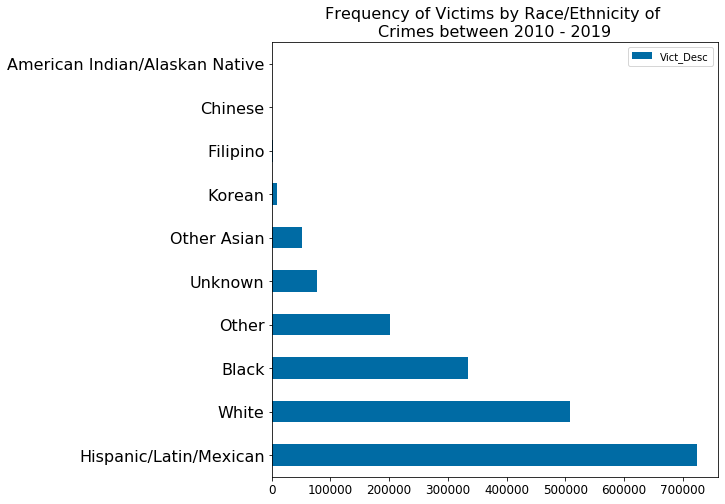

In [44]:
plt.style.use('tableau-colorblind10')
top10_vict_desc_all_crimes[0:10].plot.barh(stacked=False, figsize=(8,8))
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1)
plt.title("Frequency of Victims by Race/Ethnicity of \nCrimes between 2010 - 2019", fontsize=16)
plt.yticks(color='black', fontsize=16)
plt.xticks(color='black', fontsize=12)
plt.savefig("static/images/Figure12.png", bbox_inches='tight') 
plt.show()

<hr style="border: 2px solid black">

## Visualize the top 10 victim groups for only weapon related crimes using the  <font color="red">df_crimes_weapons</font> dataset

In [45]:
vict_desc_weapon_crimes = df_crimes_weapons['Vict_Desc'].value_counts(ascending=False)
top10_vict_desc_weapon = list(vict_desc_weapon_crimes.index.values.tolist())[0:10]

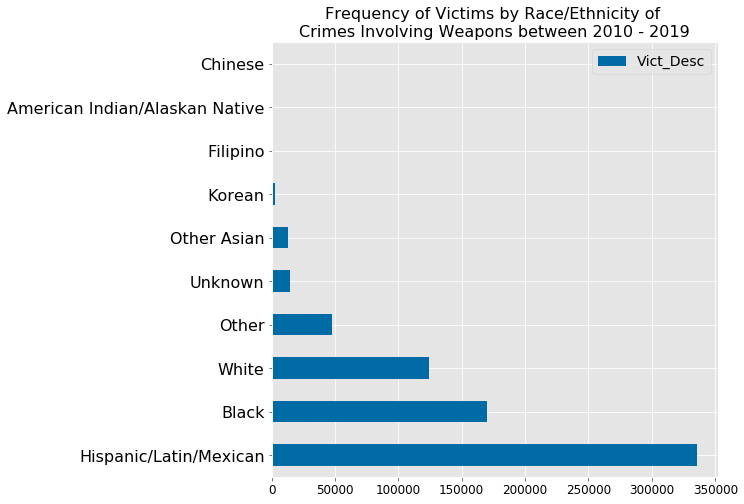

In [128]:
plt.style.use('tableau-colorblind10')
vict_desc_weapon_crimes[0:10].plot.barh(stacked=False, figsize=(8,8))
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1)
plt.title("Frequency of Victims by Race/Ethnicity of \nCrimes Involving Weapons between 2010 - 2019", fontsize=16)
plt.yticks(color='black', fontsize=16)
plt.xticks(color='black', fontsize=12)
plt.savefig("static/images/Figure13.png", bbox_inches='tight') 
plt.show()

<strong>

### <font color="blue">Comment:</font>
 - White people were 2nd highest victim in all crimes but switched to third position, replaced by black individuals for crimes that involve weapons.
 - Hispanic are the largest victim group.
</strong>

<hr style="border: 2px solid black">

# Determine total crimes by area using the  <font color="red">df_crimes</font> dataset and creating a subset  <font color="red">df_areas_crimes</font> dataset

In [47]:
# Create a dataframe by area
df_areas_crimes = df_crimes[['Year','Area', 'Crime_Code', 'Crime_Desc']].copy()

In [48]:
# Group by area and count by crime_code
total_crimes_area = df_areas_crimes.groupby('Area')['Crime_Code'].agg('count')
total_crimes_df = pd.DataFrame(total_crimes_area)

In [49]:
# Relabel column
total_crimes_df.columns = ["Total_Crimes"]

In [50]:
# Sort data by crime codes with the highest incidents
total_crimes_df = total_crimes_df.sort_values("Total_Crimes", ascending = False)

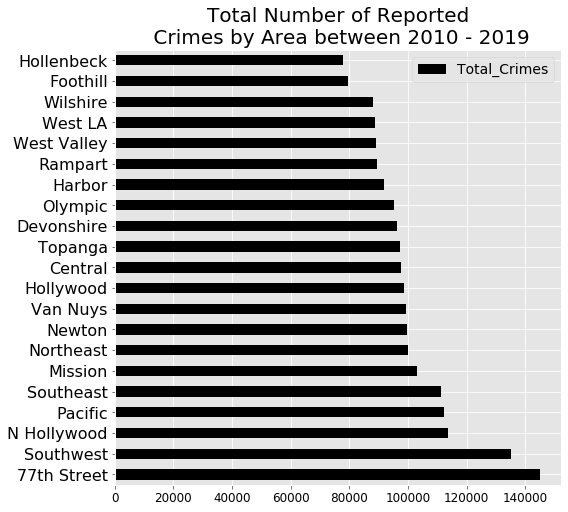

In [130]:
total_crimes_df.plot.barh(figsize=(8,8), color='black')
plt.title("Total Number of Reported\n Crimes by Area between 2010 - 2019", fontsize=20)
plt.yticks(color='black', fontsize=16)
plt.xticks(color='black', fontsize=12)
plt.ylabel("")
plt.savefig("static/images/Figure14.png", bbox_inches='tight') 
plt.show()

<hr style="border: 2px solid black">

# Characterize the total proportional crime by area using the  <font color="red">df_areas_crimes</font> subset

In [52]:
# Create a pivot table to summarize the counts of each event
alldata_areas_crime = pd.pivot_table(df_areas_crimes, values='Year', index=['Area'], columns=['Crime_Desc'], aggfunc='count')
alldata_areas_crime = alldata_areas_crime.fillna(0)
alldata_areas_crime

Crime_Desc,ABORTION/ILLEGAL,ARSON,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ATTEMPTED ROBBERY,BATTERY - SIMPLE ASSAULT,BATTERY ON A FIREFIGHTER,BATTERY POLICE (SIMPLE),BATTERY WITH SEXUAL CONTACT,"BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM",BIGAMY,BIKE - ATTEMPTED STOLEN,BIKE - STOLEN,BLOCKING DOOR INDUCTION CENTER,BOAT - STOLEN,BOMB SCARE,BRANDISH WEAPON,BRIBERY,"BUNCO, ATTEMPT","BUNCO, GRAND THEFT","BUNCO, PETTY THEFT",BURGLARY,BURGLARY FROM VEHICLE,"BURGLARY FROM VEHICLE, ATTEMPTED","BURGLARY, ATTEMPTED",CHILD ABANDONMENT,CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,CHILD ANNOYING (17YRS & UNDER),CHILD NEGLECT (SEE 300 W.I.C.),CHILD PORNOGRAPHY,CHILD STEALING,CONSPIRACY,CONTEMPT OF COURT,CONTRIBUTING,COUNTERFEIT,"CREDIT CARDS, FRAUD USE ($950 & UNDER","CREDIT CARDS, FRAUD USE ($950.01 & OVER)",CRIMINAL HOMICIDE,CRIMINAL THREATS - NO WEAPON DISPLAYED,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER),CRUELTY TO ANIMALS,"DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER","DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400",DISCHARGE FIREARMS/SHOTS FIRED,DISHONEST EMPLOYEE - GRAND THEFT,DISHONEST EMPLOYEE - PETTY THEFT,DISHONEST EMPLOYEE ATTEMPTED THEFT,DISRUPT SCHOOL,DISTURBING THE PEACE,DOCUMENT FORGERY / STOLEN FELONY,DOCUMENT WORTHLESS ($200 & UNDER),DOCUMENT WORTHLESS ($200.01 & OVER),DRIVING WITHOUT OWNER CONSENT (DWOC),"DRUGS, TO A MINOR",DRUNK ROLL,DRUNK ROLL - ATTEMPT,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)","EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)",EXTORTION,FAILURE TO DISPERSE,FAILURE TO YIELD,FALSE IMPRISONMENT,FALSE POLICE REPORT,FIREARMS RESTRAINING ORDER (FIREARMS RO),FIREARMS TEMPORARY RESTRAINING ORDER (TEMP FIREARMS RO),GRAND THEFT / AUTO REPAIR,GRAND THEFT / INSURANCE FRAUD,HUMAN TRAFFICKING - COMMERCIAL SEX ACTS,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,ILLEGAL DUMPING,INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES),INCITING A RIOT,INDECENT EXPOSURE,INTIMATE PARTNER - AGGRAVATED ASSAULT,INTIMATE PARTNER - SIMPLE ASSAULT,KIDNAPPING,KIDNAPPING - GRAND ATTEMPT,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",LEWD CONDUCT,LEWD/LASCIVIOUS ACTS WITH CHILD,LYNCHING,LYNCHING - ATTEMPTED,"MANSLAUGHTER, NEGLIGENT",ORAL COPULATION,OTHER ASSAULT,OTHER MISCELLANEOUS CRIME,PANDERING,PEEPING TOM,PETTY THEFT - AUTO REPAIR,PICKPOCKET,"PICKPOCKET, ATTEMPT",PIMPING,PROWLER,PURSE SNATCHING,PURSE SNATCHING - ATTEMPT,"RAPE, ATTEMPTED","RAPE, FORCIBLE",RECKLESS DRIVING,"REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)",RESISTING ARREST,ROBBERY,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ",SEXUAL PENETRATION W/FOREIGN OBJECT,SHOPLIFTING - ATTEMPT,SHOPLIFTING - PETTY THEFT ($950 & UNDER),SHOPLIFTING-GRAND THEFT ($950.01 & OVER),SHOTS FIRED AT INHABITED DWELLING,"SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT",SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH,STALKING,TELEPHONE PROPERTY - DAMAGE,THEFT FROM MOTOR VEHICLE - ATTEMPT,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),THEFT FROM PERSON - ATTEMPT,THEFT OF IDENTITY,THEFT PLAIN - ATTEMPT,THEFT PLAIN - PETTY ($950 & UNDER),"THEFT, COIN MACHINE - ATTEMPT","THEFT, COIN MACHINE - GRAND ($950.01 & OVER)","THEFT, COIN MACHINE - PETTY ($950 & UNDER)","THEFT, PERSON","THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD",THREATENING PHONE CALLS/LETTERS,THROWING OBJECT AT MOVING VEHICLE,TILL TAP - ATTEMPT,TILL TAP - GRAND THEFT ($950.01 & OVER),TILL TAP - PETTY ($950 & UNDER),TRAIN WRECKING,TRESPASSING,UNAUTHORIZED COMPUTER ACCESS,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",VANDALISM - MISDEAMEANOR ($399 OR UNDER),VEHICLE - ATTEMPT STOLEN,"VEHICLE - MOTORIZED SCOOTERS, BICYCLES, AND WHEELCHAIRS",VEHICLE - STOLEN,VIOLATION OF COURT ORDER,VIOLATION OF RESTRAINING ORDER,VIOLATION OF TEMPORARY RESTRAINING ORDER,WEAPONS POSSESSION/BOMBING
Area,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

<hr style="border: 2px solid black">

# Visualize the total proportion of crimes by area using the  <font color="red">alldata_areas_crime</font> pivot table

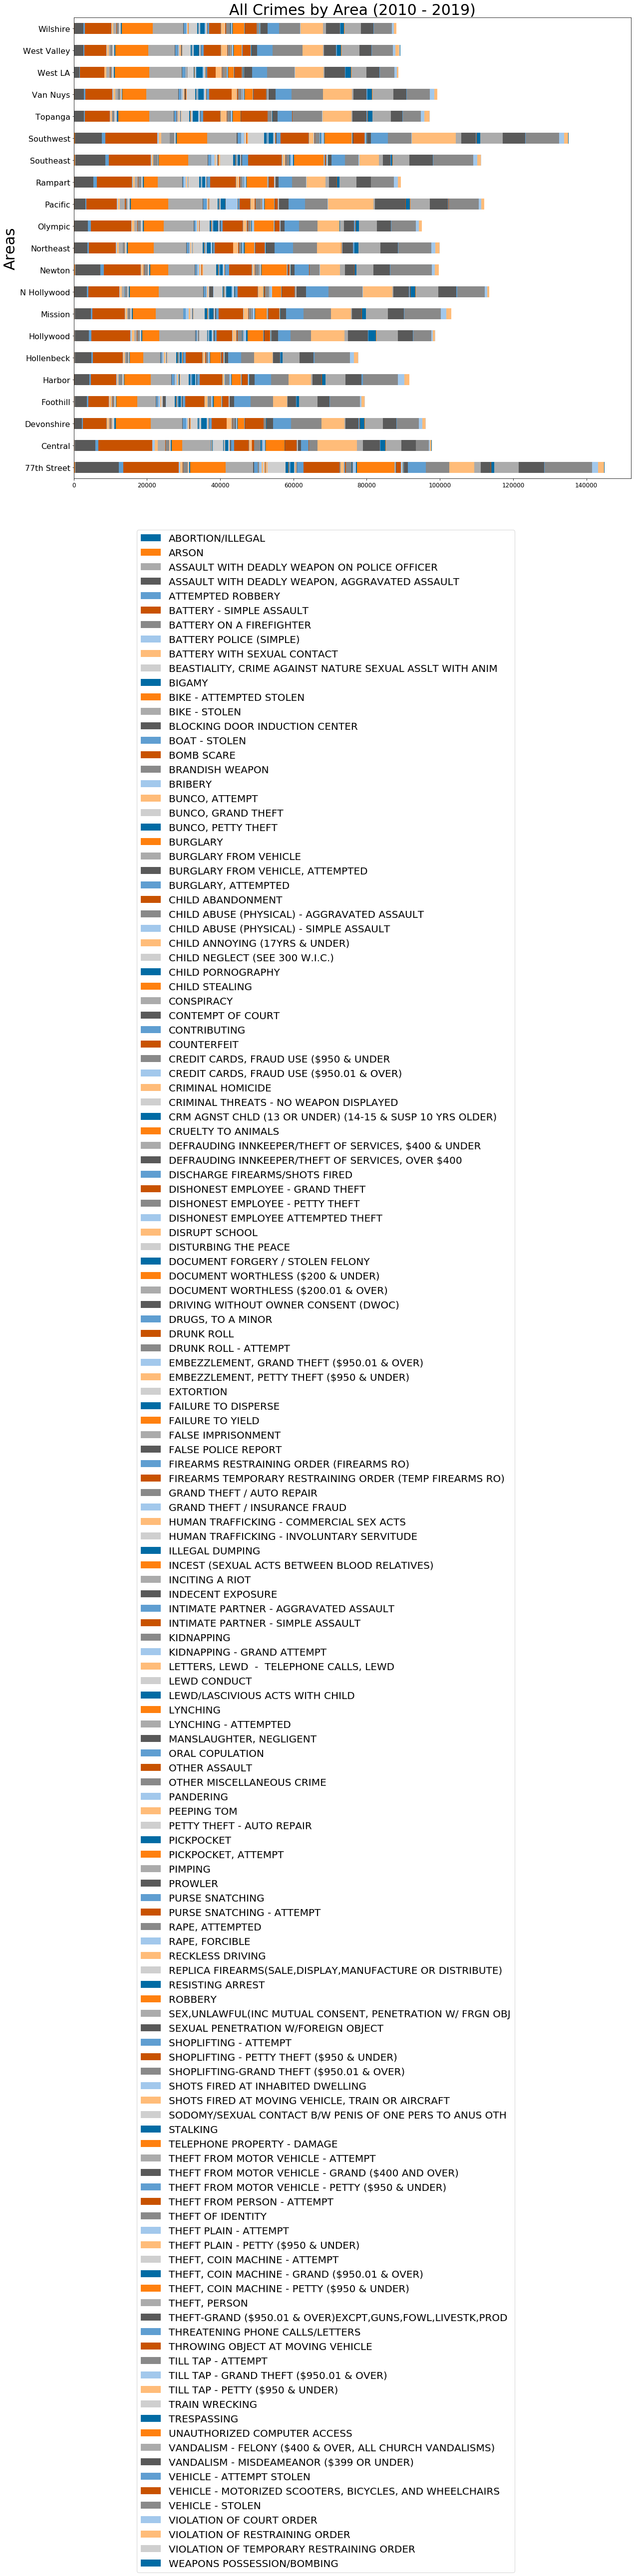

In [53]:
# plt.style.use('ggplot')
alldata_areas_crime.plot.barh(stacked=True, figsize=(20,17))
# plt.rcParams.update({'axes.titlesize': 40})
plt.rc('legend',**{'fontsize':20})
plt.yticks(fontsize=16, color='black')
plt.xticks(fontsize=12, color='black')
plt.ylabel("Areas", fontsize=30, color = 'black')
plt.legend(loc='upper right', bbox_to_anchor=(.8, -.1), ncol=1)
plt.title("All Crimes by Area (2010 - 2019)", fontsize=30)
# plt.savefig("static/images/Figure15.png", bbox_inches='tight')
plt.show()

<hr style="border: 2px solid black">

# Characterize the total proportional crime for those involving weapons by area using the <font color="red">df_crimes_weapons</font> dataset

## Top 10 Crime Totals

In [54]:
top_crimes = df_crimes_weapons['Crime_Desc'].value_counts()
top10_all_crimes = pd.DataFrame(top_crimes).head(10)
top10_all_crimes = top10_all_crimes.reset_index()
top10_all_crimes.columns = ['Crime', 'Totals']
top10_all_crimes

,Crime,Totals
0,BATTERY - SIMPLE ASSAULT,189523
1,INTIMATE PARTNER - SIMPLE ASSAULT,108063
2,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",92488
3,ROBBERY,83576
4,CRIMINAL THREATS - NO WEAPON DISPLAYED,49222
5,BRANDISH WEAPON,15407
6,INTIMATE PARTNER - AGGRAVATED ASSAULT,15342
7,ATTEMPTED ROBBERY,11953
8,BATTERY WITH SEXUAL CONTACT,11050
9,BURGLARY,10912


## Top 10 Weapon Descriptions

In [55]:
top_weapons = df_crimes_weapons['Weapon_Desc'].value_counts()
top10_weapon_crimes = pd.DataFrame(top_weapons).head(10)
top10_weapon_crimes = top10_weapon_crimes.reset_index()
top10_weapon_crimes.columns = ["Weapons", 'Totals']
top10_weapon_crimes

,Weapons,Totals
0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",429671
1,VERBAL THREAT,58561
2,UNKNOWN WEAPON/OTHER WEAPON,57345
3,HAND GUN,34084
4,SEMI-AUTOMATIC PISTOL,12901
5,KNIFE WITH BLADE 6INCHES OR LESS,12844
6,OTHER KNIFE,9779
7,UNKNOWN FIREARM,7900
8,VEHICLE,7230
9,REVOLVER,5563


In [56]:
# Create a dataframe by area
df_weapon_areas_crimes = df_crimes_weapons[['Year','Area', 'Crime_Code', 'Crime_Desc']].copy(deep=True)

In [57]:
# Group by area and count by crime_code
total_weapon_crimes_area = df_weapon_areas_crimes.groupby('Area')['Crime_Code'].agg('count')
total_weapon_crimes_df = pd.DataFrame(total_weapon_crimes_area)

In [58]:
# Relabel column
total_weapon_crimes_df.columns = ["Total_Crimes"]

In [59]:
# Sort data by crime codes with the highest incidents
total_weapon_crimes_df = total_weapon_crimes_df.sort_values("Total_Crimes", ascending = False)

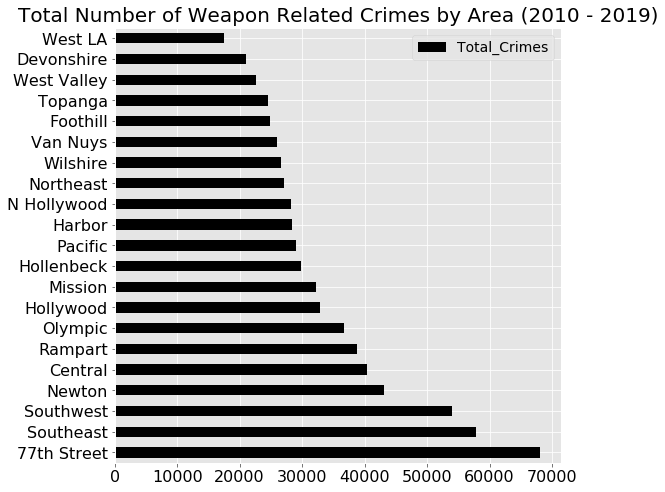

In [129]:
total_weapon_crimes_df.plot.barh(figsize=(8,8), color='black')
plt.title("Total Number of Weapon Related Crimes by Area (2010 - 2019)", fontsize=20)
plt.yticks(color='black', fontsize=16)
plt.xticks(color='black', fontsize=16)
plt.ylabel("")
plt.savefig("static/images/Figure16.png", bbox_inches='tight') 
plt.show()

<hr style="border: 2px solid black">

# Characterize the total proportion of crime by area using the  <font color="red">df_weapon_areas_crimes</font> subset

In [61]:
# Create a pivot table to summarize the counts of each event
weapon_areas_crime = pd.pivot_table(df_weapon_areas_crimes, values='Year', index=['Area'], columns=['Crime_Desc'], aggfunc='count')
weapon_areas_crime = weapon_areas_crime.fillna(0)
weapon_areas_crime

Crime_Desc,ABORTION/ILLEGAL,ARSON,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ATTEMPTED ROBBERY,BATTERY - SIMPLE ASSAULT,BATTERY ON A FIREFIGHTER,BATTERY POLICE (SIMPLE),BATTERY WITH SEXUAL CONTACT,"BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM",BIKE - ATTEMPTED STOLEN,BIKE - STOLEN,BOMB SCARE,BRANDISH WEAPON,BRIBERY,"BUNCO, ATTEMPT","BUNCO, GRAND THEFT","BUNCO, PETTY THEFT",BURGLARY,BURGLARY FROM VEHICLE,"BURGLARY FROM VEHICLE, ATTEMPTED","BURGLARY, ATTEMPTED",CHILD ABANDONMENT,CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,CHILD ANNOYING (17YRS & UNDER),CHILD NEGLECT (SEE 300 W.I.C.),CHILD PORNOGRAPHY,CHILD STEALING,CONSPIRACY,CONTEMPT OF COURT,CONTRIBUTING,COUNTERFEIT,"CREDIT CARDS, FRAUD USE ($950.01 & OVER)",CRIMINAL HOMICIDE,CRIMINAL THREATS - NO WEAPON DISPLAYED,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER),CRUELTY TO ANIMALS,"DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER","DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400",DISCHARGE FIREARMS/SHOTS FIRED,DISHONEST EMPLOYEE - GRAND THEFT,DISHONEST EMPLOYEE - PETTY THEFT,DISRUPT SCHOOL,DISTURBING THE PEACE,DOCUMENT FORGERY / STOLEN FELONY,DOCUMENT WORTHLESS ($200 & UNDER),DOCUMENT WORTHLESS ($200.01 & OVER),DRIVING WITHOUT OWNER CONSENT (DWOC),"DRUGS, TO A MINOR",DRUNK ROLL,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)","EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)",EXTORTION,FAILURE TO DISPERSE,FAILURE TO YIELD,FALSE IMPRISONMENT,FALSE POLICE REPORT,GRAND THEFT / INSURANCE FRAUD,HUMAN TRAFFICKING - COMMERCIAL SEX ACTS,HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,ILLEGAL DUMPING,INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES),INCITING A RIOT,INDECENT EXPOSURE,INTIMATE PARTNER - AGGRAVATED ASSAULT,INTIMATE PARTNER - SIMPLE ASSAULT,KIDNAPPING,KIDNAPPING - GRAND ATTEMPT,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",LEWD CONDUCT,LEWD/LASCIVIOUS ACTS WITH CHILD,LYNCHING,LYNCHING - ATTEMPTED,"MANSLAUGHTER, NEGLIGENT",ORAL COPULATION,OTHER ASSAULT,OTHER MISCELLANEOUS CRIME,PANDERING,PEEPING TOM,PETTY THEFT - AUTO REPAIR,PICKPOCKET,"PICKPOCKET, ATTEMPT",PIMPING,PROWLER,PURSE SNATCHING,PURSE SNATCHING - ATTEMPT,"RAPE, ATTEMPTED","RAPE, FORCIBLE",RECKLESS DRIVING,"REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)",RESISTING ARREST,ROBBERY,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ",SEXUAL PENETRATION W/FOREIGN OBJECT,SHOPLIFTING - ATTEMPT,SHOPLIFTING - PETTY THEFT ($950 & UNDER),SHOPLIFTING-GRAND THEFT ($950.01 & OVER),SHOTS FIRED AT INHABITED DWELLING,"SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT",SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH,STALKING,TELEPHONE PROPERTY - DAMAGE,THEFT FROM MOTOR VEHICLE - ATTEMPT,THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER),THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),THEFT FROM PERSON - ATTEMPT,THEFT OF IDENTITY,THEFT PLAIN - ATTEMPT,THEFT PLAIN - PETTY ($950 & UNDER),"THEFT, COIN MACHINE - ATTEMPT","THEFT, COIN MACHINE - GRAND ($950.01 & OVER)","THEFT, COIN MACHINE - PETTY ($950 & UNDER)","THEFT, PERSON","THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD",THREATENING PHONE CALLS/LETTERS,THROWING OBJECT AT MOVING VEHICLE,TILL TAP - PETTY ($950 & UNDER),TRAIN WRECKING,TRESPASSING,UNAUTHORIZED COMPUTER ACCESS,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",VANDALISM - MISDEAMEANOR ($399 OR UNDER),VEHICLE - ATTEMPT STOLEN,"VEHICLE - MOTORIZED SCOOTERS, BICYCLES, AND WHEELCHAIRS",VEHICLE - STOLEN,VIOLATION OF COURT ORDER,VIOLATION OF RESTRAINING ORDER,VIOLATION OF TEMPORARY RESTRAINING ORDER,WEAPONS POSSESSION/BOMBING
Area,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
77th Street,0.0,80.0,135.0,11758.0,1305.0,14994.0,10.0,487.0,532.0,1.0,1.0,4.0,20.0,1321.0,0.0,2.0,7.0,5.0,480.0,195.0,21.0,85.0,2.0,362.0,743.0,111.0,88.0,3.0,13.0,1.0,13.0,4.0,2.0,0.0,436.0,4433.0,739.0,43.0,1.0,0.0,409.0,0.0,0.0,2.0,23.0,4.0,0.0,

<hr style="border: 2px solid black">

# Visualize the total proportion of weapon related crimes by area using the  <font color="red">weapon_areas_crime</font> pivot table

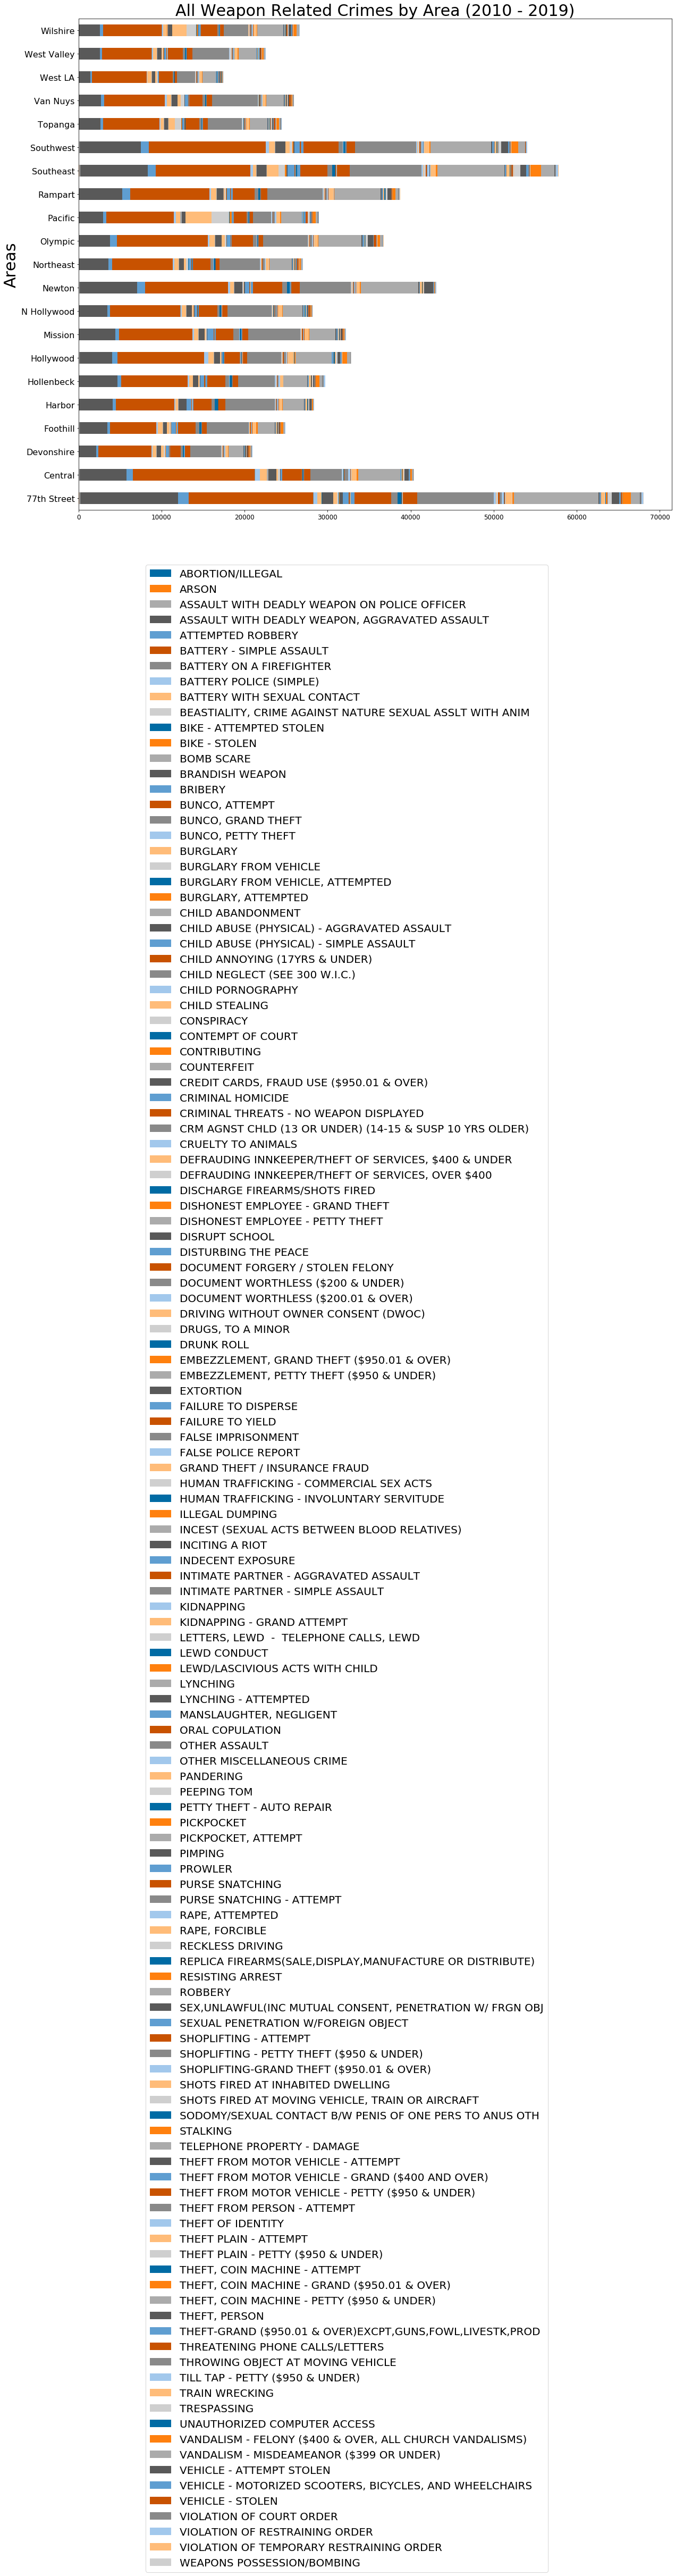

In [62]:
# plt.style.use('ggplot')
weapon_areas_crime.plot.barh(stacked=True, figsize=(20,17))
# plt.rcParams.update({'axes.titlesize': 40})
plt.rc('legend',**{'fontsize':20})
plt.yticks(fontsize=16, color='black')
plt.xticks(fontsize=12, color='black')
plt.ylabel("Areas", fontsize=30, color = 'black')
plt.legend(loc='upper right', bbox_to_anchor=(.8, -.1), ncol=1)
plt.title("All Weapon Related Crimes by Area (2010 - 2019)", fontsize=30)
plt.savefig("static/images/Figure17.png", bbox_inches='tight') 
plt.show()

<hr style="border: 3px solid blue">

# Characterize the Top 10 weapon related crimes between 2010 - 2019 using the <font color="red">df_crimes</font> dataset 

### Crimes characterization
 - How many unique crimes (codes and descriptions) does the LAPD track
 - Which are the top 10 most frequencly reported crime codes
 - Whicha are the top 10 most frequencly reported crime descriptions

### Weapon charaterization
 - How many unique weapons (codes and descriptions) does the LAPD track
 - Which are the top 10 most frequently reported weapon codes
 - Whicha are the top 10 most frequently reported weapon descriptions

<hr style="border: 1px solid black">

## Characterize crimes codes and crime descriptions in the <font color="red">df_crimes</font> dataset

In [63]:
# The number of unique crime codes
unique_crime_codes = len(df_crimes['Crime_Code'].unique())
print(f'The total numer of unique crime codes LAPD tracks in this dataset is: {unique_crime_codes}')

The total numer of unique crime codes LAPD tracks in this dataset is: 148


In [64]:
# The number of unique crime codes
unique_crime_desc = len(df_crimes['Crime_Desc'].unique())
print(f'The total numer of unique crime desc LAPD uses in this dataset is: {unique_crime_desc}')

The total numer of unique crime desc LAPD uses in this dataset is: 141


<strong>
    <font color="blue">Comment:</font><br>
    Crime codes > Crime descriptions, which may mean that some crime descriptions are used for multiple crime codes in this dataset. Documentation for how codes are used would need to be consulted.
</stong>

In [65]:
# Return series with total counts of each crime code
crime_code_frequency = df_crimes['Crime_Code'].value_counts()

In [66]:
# Saves the top 10 crime codes with the highest number of events
top_10_crimes = list(crime_code_frequency.index.values.tolist())[0:10]

In [67]:
# Display top 10 crime codes
top_10_crimes

[624, 330, 510, 440, 310, 354, 626, 740, 230, 745]

In [68]:
# Return series with total counts for each unique crime description
crimes_desc_frequency = df_crimes['Crime_Desc'].value_counts()

In [69]:
# Saves the top ten crime descriptions into a list 
top_10_crimes_descs = list(crimes_desc_frequency.index.values.tolist())[0:10]

<hr style="border: 2px solid black">

## Visualize the top 10 crimes reported in the  <font color="red">df_crimes</font> dataset

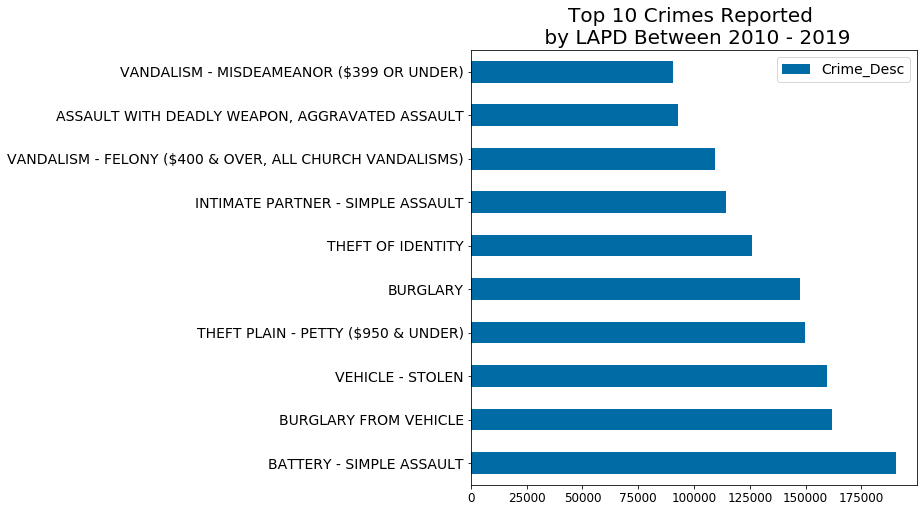

In [70]:
crimes_desc_frequency[0:10].plot.barh(stacked=False, figsize=(8,8))
plt.yticks(fontsize=14, color='black')
plt.xticks(fontsize=12, color='black')
plt.ylabel("", color = 'black')
plt.rc('legend',**{'fontsize':14})
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1)
plt.title("Top 10 Crimes Reported \n by LAPD Between 2010 - 2019", fontsize=20)
plt.savefig("static/images/Figure2a.png", bbox_inches='tight')
plt.show()

<hr style="border: 2px solid black">

# Weapon Characterization

In [71]:
# The number of unique crime codes
unique_weapon_codes = len(df_crimes['Weapon_Code'].unique())
print(f'The total numer of unique weapon codes that LAPD tracks in this dataset is: {unique_weapon_codes}')

The total numer of unique weapon codes that LAPD tracks in this dataset is: 81


In [72]:
# The number of unique crime codes
unique_weapon_desc = len(df_crimes['Weapon_Desc'].unique())
print(f'The total numer of unique weapon desc that LAPD uses in this dataset is: {unique_weapon_desc}')

The total numer of unique weapon desc that LAPD uses in this dataset is: 80


<strong>
    <font color="blue">Comment:</font><br>
    Weapon codes > Weapon descriptions, which may mean a weapon descriptions is used for more than 1 crime codes in this dataset. Documentation for how codes are used would need to be consulted.
</stong>

In [73]:
# Return series with total counts of each crime code
weapon_code_frequency = df_crimes['Weapon_Code'].value_counts()

In [74]:
# Saves the top 10 crime codes with the highest number of events
top_10_weapon_codes = list(weapon_code_frequency.index.values.tolist())[0:10]

In [75]:
# Display top 10 crime codes
top_10_weapon_codes

[400.0, 511.0, 500.0, 102.0, 109.0, 200.0, 207.0, 106.0, 307.0, 101.0]

In [76]:
# Return series with total counts for each unique crime description
weapon_desc_frequency = df_crimes['Weapon_Desc'].value_counts()

In [77]:
# Saves the top ten crime descriptions into a list 
top_10_weapon_descs = list(weapon_desc_frequency.index.values.tolist())[0:10]

<hr style="border: 2px solid black">

## Visualize the top 10 weapon descriptions reported in the  <font color="red">df_crimes</font> dataset

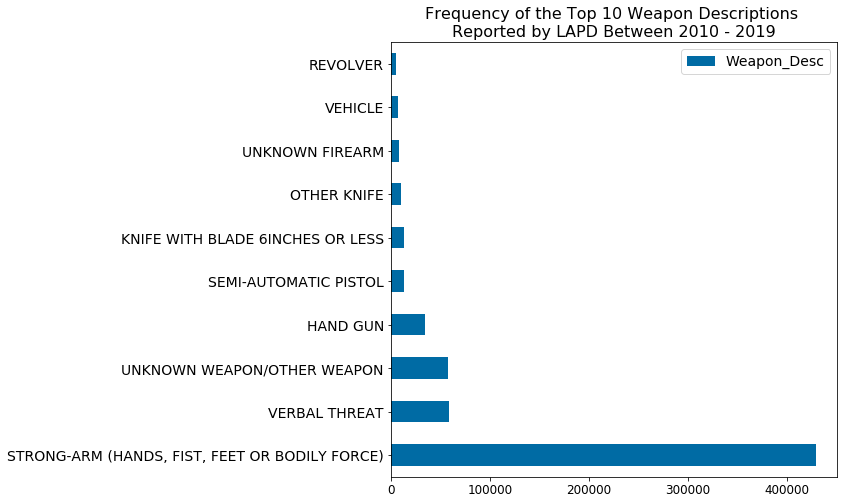

In [78]:
weapon_desc_frequency[0:10].plot.barh(stacked=False, figsize=(8,8))
plt.yticks(fontsize=14, color='black')
plt.xticks(fontsize=12, color='black')
plt.ylabel("", color = 'black')
plt.rc('legend',**{'fontsize':14})
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1)

plt.title("Frequency of the Top 10 Weapon Descriptions \nReported by LAPD Between 2010 - 2019", fontsize=16)
plt.savefig("static/images/Figure2b.png", bbox_inches='tight') 
plt.show()

<hr style="border: 3px solid blue">

# Characterize the Top 10 weapon related crimes using the <font color="red">df_crimes_weapons</font> dataset 

### Crimes characterization
 - How many unique crimes (codes and descriptions) does the LAPD track
 - Which are the top 10 most frequencly reported crime codes
 - Whicha are the top 10 most frequencly reported crime descriptions

### Weapon charaterization
 - How many unique weapons (codes and descriptions) does the LAPD track
 - Which are the top 10 most frequencly reported weapon codes
 - Whicha are the top 10 most frequencly reported weapon descriptions

## Characterize crimes in <font color="red">df_crimes_weapons</font> dataset

In [79]:
# The number of unique crime codes
w_unique_crime_codes = len(df_crimes_weapons['Crime_Code'].unique())
print(f'The total numer of unique crime codes that involve weapons in this dataset is: {w_unique_crime_codes}')

The total numer of unique crime codes that involve weapons in this dataset is: 130


In [80]:
# How many crime codes that LAPD reported in this period do not involve weapons?
print(f'The total numer of crime codes that do not involve weapons in this dataset are: {unique_crime_codes - w_unique_crime_codes}')

The total numer of crime codes that do not involve weapons in this dataset are: 18


In [81]:
# The number of unique crime codes
w_unique_crime_desc = len(df_crimes['Crime_Desc'].unique())
print(f'The total numer of unique crime desc that do not involve weapons in this dataset are: {w_unique_crime_desc}')

The total numer of unique crime desc that do not involve weapons in this dataset are: 141


In [82]:
# Are there any crime descriptions that are not listed for crimes involving weapons?
print(unique_crime_desc - w_unique_crime_desc != 0)

False


<strong>
    
<font color="blue">Comment:</font><br>
 - There are 21 crime codes that do not involve weapons.
 - All weapon descriptions are represented in weapon related crimes.
</stong>

In [83]:
# Return series with total counts of each crime code
weapon_crime_code_frequency = df_crimes_weapons['Crime_Code'].value_counts()

In [84]:
# Saves the top 10 crime codes with the highest number of events
top_10_weapon_crimes = list(weapon_crime_code_frequency.index.values.tolist())[0:10]

In [85]:
# Display top 10 crime codes
top_10_weapon_crimes

[624, 626, 230, 210, 930, 236, 761, 220, 860, 310]

In [86]:
# Return series with total counts for each unique crime description
weapon_crimes_desc_frequency = df_crimes_weapons['Crime_Desc'].value_counts()

In [87]:
# Saves the top ten crime descriptions into a list 
top_10_weapon_crimes_descs = weapon_crimes_desc_frequency.index.array[0:10]

<hr style="border: 2px solid black">

## Visualize the top 10 weapon related crime descriptions reported in the  <font color="red">df_crimes_weapons</font> dataset

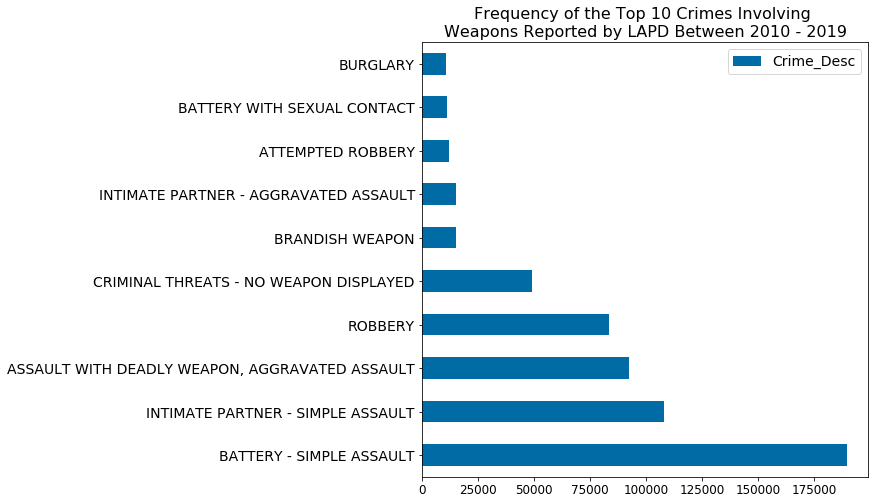

In [88]:
weapon_crimes_desc_frequency[0:10].plot.barh(stacked=False, figsize=(8,8))
plt.yticks(fontsize=14, color='black')
plt.xticks(fontsize=12, color='black')
plt.ylabel("", color = 'black')
plt.rc('legend',**{'fontsize':14})
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1)
plt.title("Frequency of the Top 10 Crimes Involving \nWeapons Reported by LAPD Between 2010 - 2019", fontsize=16)
plt.savefig("static/images/Figure3.png", bbox_inches='tight') 
plt.show()

<hr style="border: 3px solid blue">

# Evaluate top 10 weapons and top 10 crimes
 
## Steps
<ol>
    <li>Create a list of the most frequent weapon codes <code>weapon_code_frequencies</code> in the <code>df_crimes_weapons</code> dataframe</li>
    <li>Create a new subset dataframe <code>top_10_weapon_codes_df</code> that contains only instances from <code>df_crimes_weapons</code> that have the one of the top 10 weapon codes in the <code>weapon_code_frequencies</code> array.</li>   
</ol>

## Create filtered dataset <font color="red">top_10_weapon_desc_df</font> that only includes the top 10 weapon desc

In [89]:
# Step 1: Filter data for incidents that contain top 10 weapons
top_10_weapon_data = []
# For loop iterates through dataframe and will extract all rows that contains a top 10 weapon desc
for value in top_10_weapon_descs:
    temp_df = df_crimes_weapons.loc[df_crimes_weapons['Weapon_Desc'] == value]
    top_10_weapon_data.append(temp_df)

In [90]:
# Create the top_10_weapon_codes dataframe
top_10_weapon_desc_df = pd.concat(top_10_weapon_data)

<strong>

<font color="blue">Comment:</font>
 - Data has been filtered for only the top 10 weapon descriptions in dataset
</strong>

## Filter the dataset <font color="red">top_10_weapon_desc_df</font>  for Instances that contain only the top 10 crime descriptions 

 - Use data subset <code>top_10_weapon_desc_df</code> and filter dataset using the <code>top_10_weapon_crimes_desc</code> list

In [91]:
# Step 1: Create a list of the most frequent crime desc listed in the top_10_weapon_codes_df dataframe
crimes_desc_frequencies = top_10_weapon_desc_df.Crime_Desc.value_counts().index.values[0:10].astype('str')

In [92]:
# Step 2: Create Filter data for incidents that contain top 10 crime descriptions
# Create empty array that will contain the filtered subset
top_10_weapon_crime_desc = []
# For loop iterates through dataframe and will extract all rows that contains a top 10 crime descriptions
for value in crimes_desc_frequencies:
    temp_df = top_10_weapon_desc_df.loc[top_10_weapon_desc_df['Crime_Desc'] == value]
    top_10_weapon_crime_desc.append(temp_df)

In [93]:
# Create the top_10_df dataframe
top_10_df = pd.concat(top_10_weapon_crime_desc)

In [94]:
# Create a pivot table to summarize the counts of each event
top_10_pivot = pd.pivot_table(top_10_df, values='Year', index=['Crime_Desc'], columns=['Weapon_Desc'], aggfunc='count')
# Replace all nan values with 0
top_10_pivot.fillna(0)

Weapon_Desc,HAND GUN,KNIFE WITH BLADE 6INCHES OR LESS,OTHER KNIFE,REVOLVER,SEMI-AUTOMATIC PISTOL,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",UNKNOWN FIREARM,UNKNOWN WEAPON/OTHER WEAPON,VEHICLE,VERBAL THREAT
Crime_Desc,,,,,,,,,,
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",13049.0,5224.0,4109.0,1686.0,4669.0,13498.0,3630.0,10118.0,5674.0,372.0
ATTEMPTED ROBBERY,1088.0,587.0,412.0,238.0,452.0,5951.0,73.0,531.0,14.0,466.0
BATTERY - SIMPLE ASSAULT,58.0,113.0,58.0,20.0,17.0,173804.0,15.0,10192.0,145.0,383.0
BATTERY WITH SEXUAL CONTACT,2.0,5.0,4.0,0.0,1.0,10804.0,0.0,177.0,1.0,16.0
BRANDISH WEAPON,3105.0,2071.0,1525.0,403.0,868.0,648.0,273.0,462.0,7.0,1072.0
BURGLARY,28.0,29.0,21.0,9.0,10.0,2389.0,6.0,7440.0,7.0,20.0
CRIMINAL THREATS - NO WEAPON DISPLAYED,404.0,457.0,302.0,75.0,136.0,1904.0,29.0,894.0,28.0,43255.0
INTIMATE PARTNER - AGGRAVATED ASSAULT,268.0,536.0,375.0,39.0,106.0,9449.0,25.0,1166.0,392.0,82.0
INTIMATE PARTNER - SIMPLE ASSAULT,42.0,206.0,135.0,6.0,20.0,101437.0,2.0,3614.0,81.0,210.0


In [95]:
# Rename the index column to Crimes
top_10_pivot.index.names = ['Crimes']

# Sort values by the strong arm column
top_10_pivot = top_10_pivot.sort_values("STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",ascending=False)

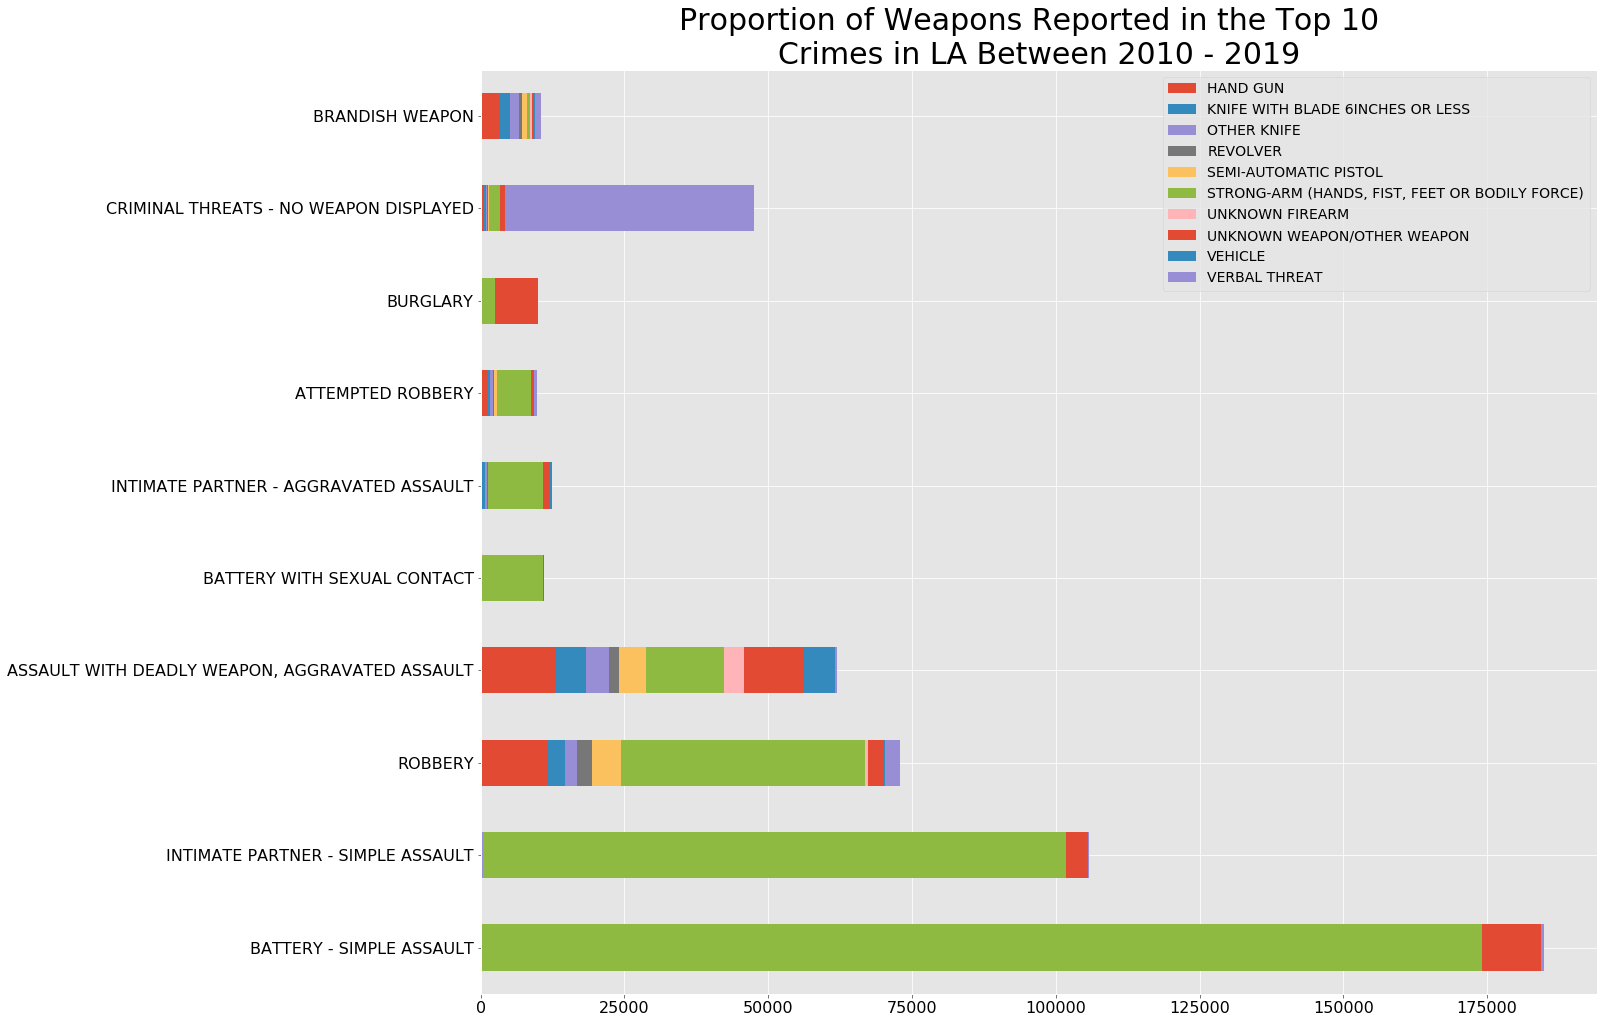

In [96]:
plt.style.use('ggplot')
top_10_pivot.plot.barh(stacked=True, figsize=(20,17))
plt.yticks(fontsize=16, color='black')
plt.xticks(fontsize=16, color='black')
plt.ylabel("", fontsize=30, color='black')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1)
plt.title("Proportion of Weapons Reported in the Top 10  \nCrimes in LA Between 2010 - 2019", fontsize=30)
plt.savefig("static/images/Figure4.png", bbox_inches='tight') 
plt.show()

<hr style="border: 2px solid black">

# Pivot table for area and types of crime

In [97]:
# Create a pivot table to summarize the counts of each event
top10_alldata_areas = pd.pivot_table(top_10_df, values='Year', index=['Area'], columns=['Weapon_Desc'], aggfunc='count')
top10_alldata_areas.fillna(0)

Weapon_Desc,HAND GUN,KNIFE WITH BLADE 6INCHES OR LESS,OTHER KNIFE,REVOLVER,SEMI-AUTOMATIC PISTOL,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",UNKNOWN FIREARM,UNKNOWN WEAPON/OTHER WEAPON,VEHICLE,VERBAL THREAT
Area,,,,,,,,,,
77th Street,4172,1061,746,795,2102,31969,994,2636,702,4256
Central,724,551,1335,120,144,22513,60,3158,170,2293
Devonshire,631,224,237,130,234,11713,69,1112,265,1315
Foothill,1186,244,346,212,155,12228,132,943,325,2069
Harbor,1270,547,360,183,509,14988,386,1049,311,2072
Hollenbeck,1465,194,543,195,744,14418,392,1460,225,2213
Hollywood,949,658,388,176,373,17944,38,1940,230,2004
Mission,1192,511,376,270,481,17428,160,1209,355,2022
N Hollywood,926,552,193,156,378,15661,89,1117,324,2244


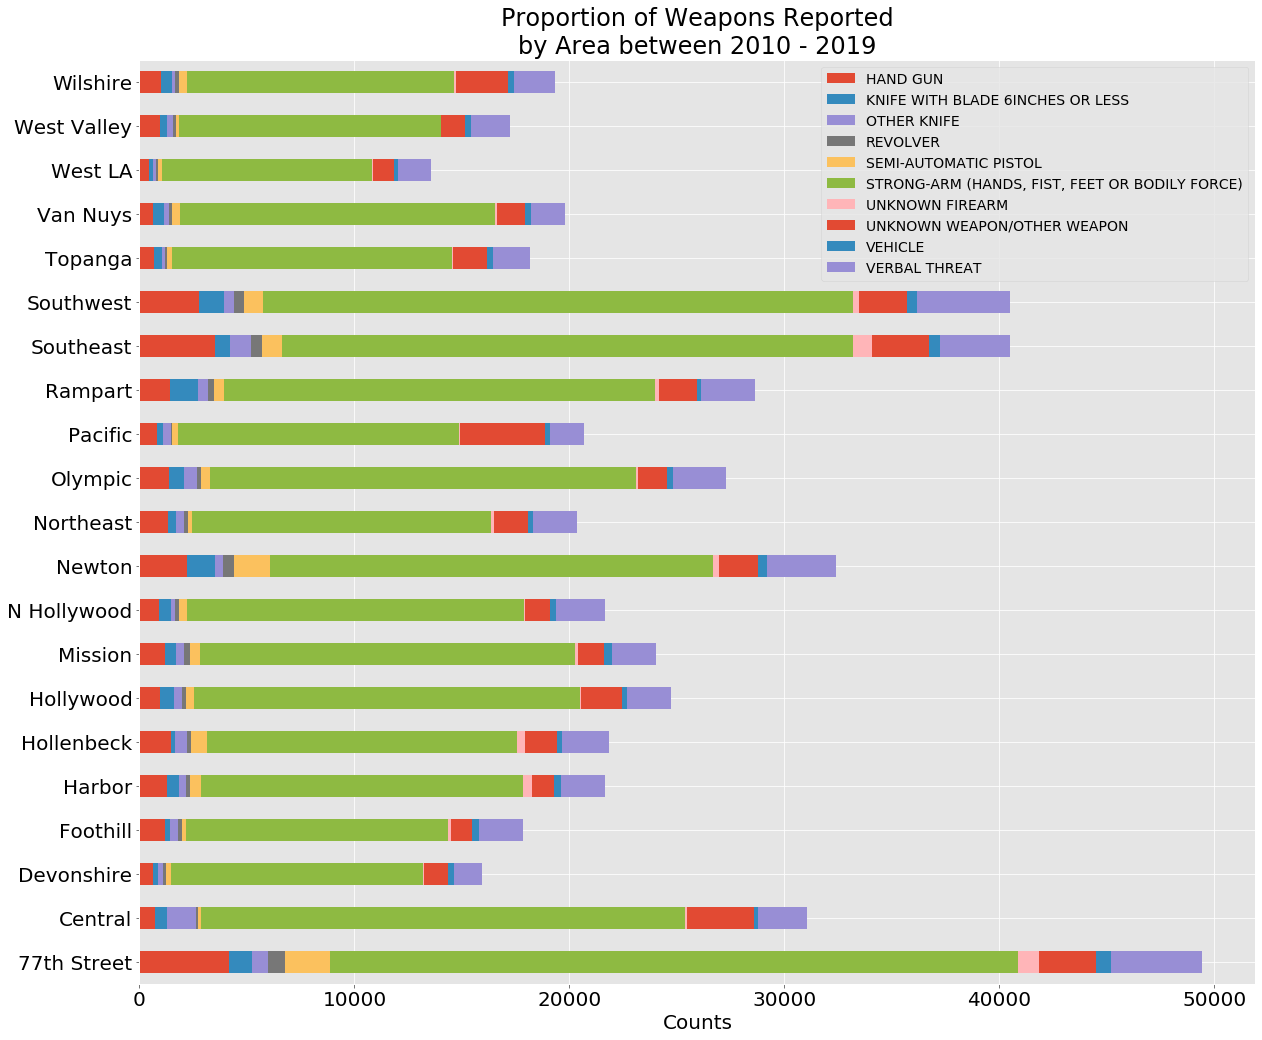

In [98]:
top10_alldata_areas.plot.barh(stacked=True, figsize=(20,17))
plt.yticks(fontsize=20, color="black")
plt.xticks(fontsize=20, color="black")
plt.ylabel("")
plt.xlabel("Counts", color="black", fontsize=20)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1)
plt.title("Proportion of Weapons Reported\nby Area between 2010 - 2019", fontsize=24)
plt.savefig("static/images/Figure18.png", bbox_inches='tight') 
plt.show()

<hr style="border: 2px solid black">

# Visualize Trends in the top 10 Weapons Reported in Crimes using the <font color="red">df_crimes_weapons</font>

 - Filter all_weapons_df to only the top 10 weapons reported in crimes
 - use the top_10_weapons list generated above and convert that into an array
 - then use a for loop to filter the database and then create a new dataframe with just 
 - the top 10 weapons

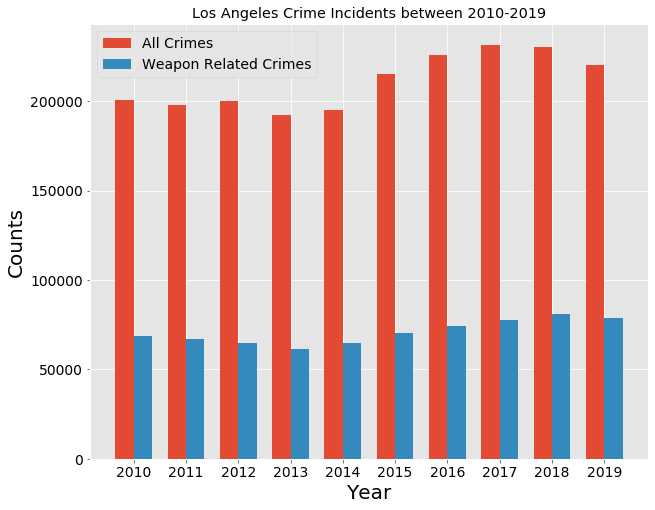

In [99]:
labels = np.sort(df_crimes_weapons['Year'].unique()[0:10]) # X axis labels
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (10,8))
rects1 = ax.bar(x - width/2, df_crimes.groupby('Year')['Crime_Code'].count().values, width, label='All Crimes')
rects2 = ax.bar(x + width/2, df_crimes_weapons.groupby('Year')['Crime_Code'].count().values, width, label='Weapon Related Crimes')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Annual Totals')
ax.set_title('Los Angeles Crime Incidents between 2010-2019')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.yticks(fontsize=14, color="black")
plt.xticks(fontsize=14, color="black")
plt.xlabel("Year", fontsize=20, color="black")
plt.ylabel("Counts", fontsize=20, color="black")
plt.legend(loc='upper left')

plt.savefig("static/images/Figure1.png", bbox_inches='tight')
plt.show()

In [100]:
# Group dataframe by weapon, and downsample to just show years
grouped = top_10_weapon_desc_df.groupby('Weapon_Desc').resample('Y', on = "Date").count()
# Group by the crime_code column, but the values in each column are the same, 
# as it is aggregated by .count()
grouped_df = grouped[['Crime_Code']]
# Then convert index values to columns using the .reset_index()
all_weapons_df = grouped_df.reset_index()
# Reduce the date column to just the year (omit the month and last day of the month)
all_weapons_df['Year'] = all_weapons_df['Date'].dt.year
# Rename columns
all_weapons_df.rename(columns={'Weapon_Desc': 'Weapon','Date_Reported':'Year', 'Crime_Code': 'Annual_Total'}, inplace=True)

In [101]:
all_weapons_df.head()

,Weapon,Date,Annual_Total,Year
0,HAND GUN,2010-12-31,3665,2010
1,HAND GUN,2011-12-31,3271,2011
2,HAND GUN,2012-12-31,3024,2012
3,HAND GUN,2013-12-31,2662,2013
4,HAND GUN,2014-12-31,2890,2014


In [102]:
# Convert top_10_weapons list into an array
array = np.asarray(all_weapons_df.Weapon.unique())
array

array(['HAND GUN', 'KNIFE WITH BLADE 6INCHES OR LESS', 'OTHER KNIFE',
       'REVOLVER', 'SEMI-AUTOMATIC PISTOL',
       'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
       'UNKNOWN FIREARM', 'UNKNOWN WEAPON/OTHER WEAPON', 'VEHICLE',
       'VERBAL THREAT'], dtype=object)

In [103]:
# Create a dataframe that only contains the top 10 weapons
frames = []
for value in array:
    temp_df = all_weapons_df.loc[all_weapons_df["Weapon"] == value]
    frames.append(temp_df)

In [104]:
# Concatenate the filtered dataframe
top10weapons = pd.concat(frames, axis=0)
# Convert the Weapon column from category to object, otherwise, the plots will contain
# every weapon category, when we just want the top 10 in the array generated above.
top10weapons = top10weapons.astype({'Weapon': 'str'})
top10weapons.head()

,Weapon,Date,Annual_Total,Year
0,HAND GUN,2010-12-31,3665,2010
1,HAND GUN,2011-12-31,3271,2011
2,HAND GUN,2012-12-31,3024,2012
3,HAND GUN,2013-12-31,2662,2013
4,HAND GUN,2014-12-31,2890,2014


### Display weapon related crimes in LA between 2010 - 2019 (Aggregated Plot)

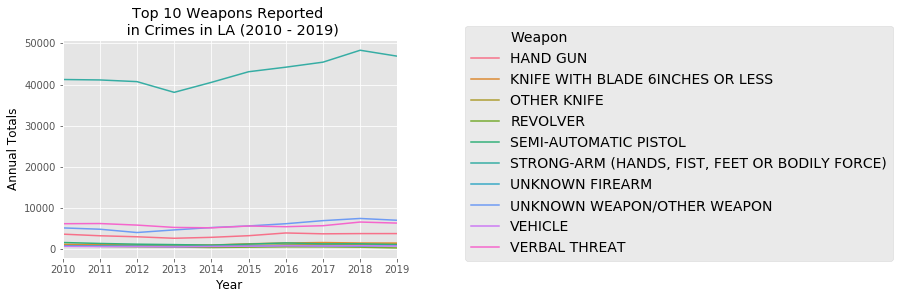

In [121]:
sns.lineplot(x="Year", y="Annual_Total", hue="Weapon", data=top10weapons)
plt.legend(loc='upper right', bbox_to_anchor=(2.5, 1.1), ncol=1)
plt.title("Top 10 Weapons Reported \n in Crimes in LA (2010 - 2019)")
plt.ylabel("Annual Totals", color='black')
plt.xlabel("Year", color='black')
plt.xlim(2010, 2019)
plt.savefig("static/images/Figure5.png", bbox_inches='tight')
plt.show()

### Display weapon related crimes in LA between 2010 - 2019 (Individual Plots)

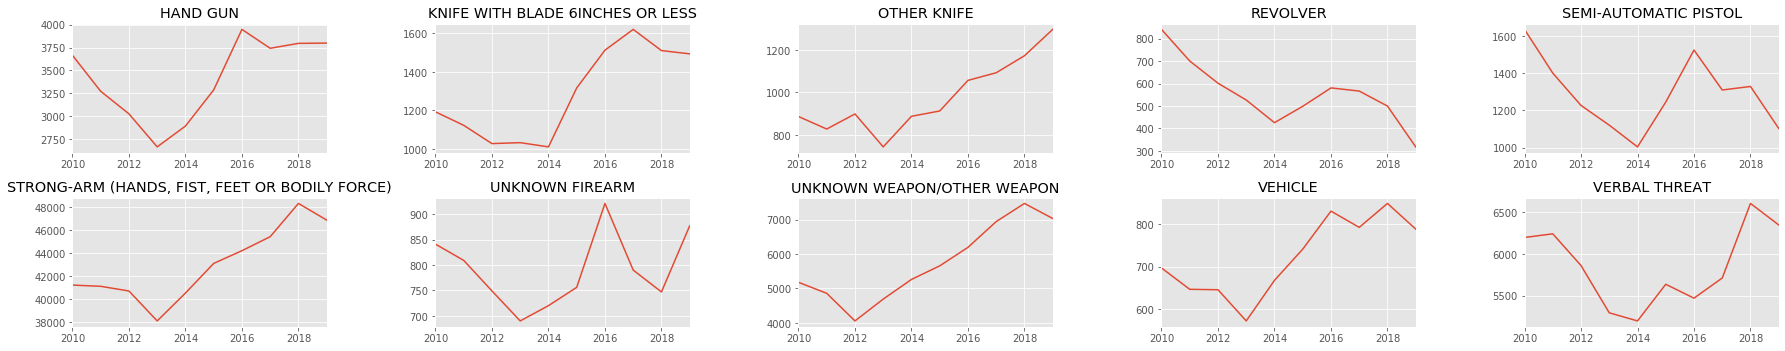

In [116]:
fig = plt.figure(figsize=(25,12))
fig.subplots_adjust(hspace=1, wspace=0.2)
for c,num in zip(array, range(1,11)):
    df0=top10weapons[top10weapons['Weapon']==c]
    ax = fig.add_subplot(5,5, num)
    ax.plot(df0['Year'], df0['Annual_Total'])
    ax.set_title(c)
    ax.set_xlim((2010, 2019))

plt.tight_layout()
plt.savefig("static/images/Figure6.png", bbox_inches='tight')
plt.show()

## Get data for leaflet javascript mapping
 - Entire dataset from 2010 - 2019 that is filtered by the top ten crimes that involve weapons
 - The file that will be saved for website will be 2019 only

In [107]:
# Create a list of the most frequent crime codes listed in the df_crimes_weapons dataframe
crimes_desc_frequencies = df_crimes_weapons.Crime_Desc.value_counts().index.values[0:10].astype('str')

In [108]:
# Create a dataframe that only contains the top 10 weapons
leaflet_data = []
for value in crimes_desc_frequencies:
    temp_df = df_crimes_weapons.loc[df_crimes["Crime_Desc"] == value]
    leaflet_data.append(temp_df)

In [109]:
# Create subset dataframe with to 10 crimes
crime_location_df = pd.concat(leaflet_data, axis=0, ignore_index = True)

In [110]:
_2019_crime_lo_df = crime_location_df.loc[crime_location_df['Year'] == 2019]

In [111]:
_2019_crime_lo_df.to_csv("static/js/crime_map_data1.csv", index=False)